In [1]:
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/train.csv')
print(data.head())

                            customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... avg_time_spent  \
0                      No    xxxxxxxx  ...         300.63   
1                       ?    CID2132

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [5]:
#removing the unnecessary columns
data=data.drop(['Name','referral_id'], axis=1)      #axis=1(columns)
data.columns

Index(['customer_id', 'age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
       'last_visit_time', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'churn_risk_score'],
      dtype='object')

In [6]:
label_encoder=preprocessing.LabelEncoder()      #OneHot encoding-categorical to numerical values


In [7]:
data1= data.columns
for i in data1[:-1]:
  data[i] = label_encoder.fit_transform(data[i])
data

,customer_id,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,32243,8,0,34811,2,3,959,1,1,0,...,15623,34190,746,18481,1,1,0,1,4,2
1,7055,22,0,5804,0,4,970,0,1,2,...,15804,8367,732,23699,1,0,1,2,5,1
2,5910,34,0,1534,1,2,680,2,1,2,...,20393,13974,779,2836,0,1,1,3,3,5
3,32400,27,1,32501,0,2,667,2,1,2,...,3521,16851,1637,5141,0,1,1,4,3,5
4,6070,21,0,29819,0,2,985,1,0,3,...,7365,16284,743,10227,0,1,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,29660,36,0,6692,3,0,994,1,0,2,...,1240,18268,1637,8724,0,1,1,0,0,4
36988,16761,19,0,2204,1,0,543,1,2,3,...,1275,7111,809,3823,1,0,0,1,1,5
36989,27942,13,0,34476,3,0,619,2,1,2,...,9656,25824,1653,11396,0,1,1,4,3,4
36990,1923,43,1,21020,2,3,896,1,1,3,...,19838,1108,774,693,1,1,0,1,0,3


In [8]:
data.isnull().any()

,0
customer_id,False
age,False
gender,False
security_no,False
region_category,False
membership_category,False
joining_date,False
joined_through_referral,False
preferred_offer_types,False
medium_of_operation,False


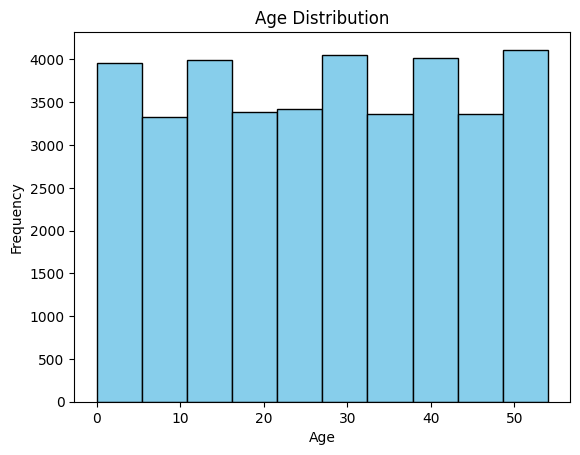

In [9]:
import matplotlib.pyplot as plt      # Histogram

plt.hist(data['age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

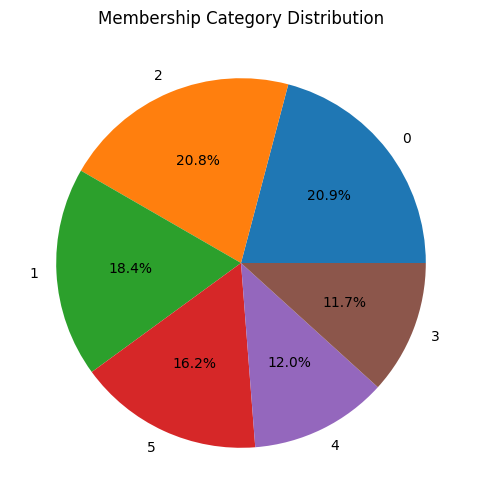

In [11]:
data['membership_category'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title("Membership Category Distribution")
plt.ylabel("")  # removes label
plt.show()

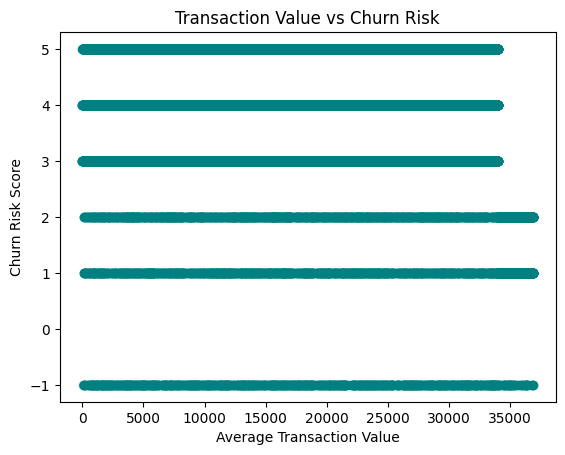

In [10]:
plt.scatter(data['avg_transaction_value'], data['churn_risk_score'], alpha=0.5, color='teal')
plt.title("Transaction Value vs Churn Risk")
plt.xlabel("Average Transaction Value")
plt.ylabel("Churn Risk Score")
plt.show()

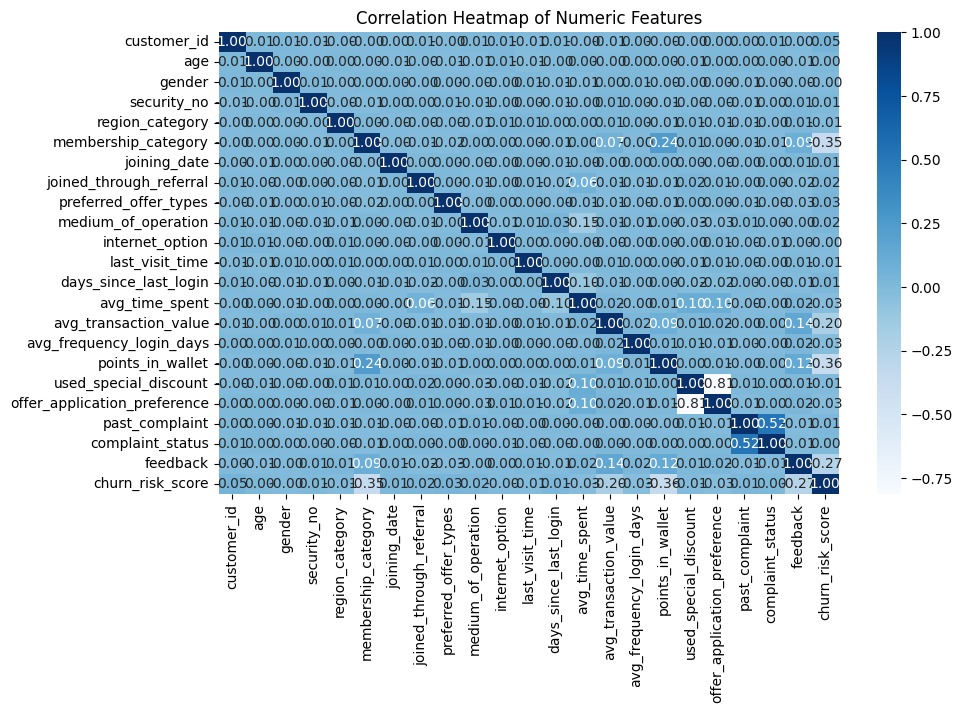

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col=data[data.columns]
VIF=pd.DataFrame()
VIF['VIF']=[variance_inflation_factor(col.values, i) for i in range(col.shape[1])]
VIF['Features'] = col.columns
VIF

,VIF,Features
0,3.916059,customer_id
1,3.777327,age
2,1.972962,gender
3,3.853380,security_no
4,2.072033,region_category
5,2.946535,membership_category
6,3.860485,joining_date
7,4.171639,joined_through_referral
8,2.444212,preferred_offer_types
9,4.519033,medium_of_operation


In [14]:
data = data.values
X, y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)  # splitting in the ratio 80:20

In [15]:
Model = DecisionTreeClassifier()
Model = Model.fit(X_train,y_train)

In [16]:
Pred=Model.predict(X_test)

In [17]:
score = Model.score(X_test, y_test)
score

0.7049601297472632

*The prediction is 70% accurate.*

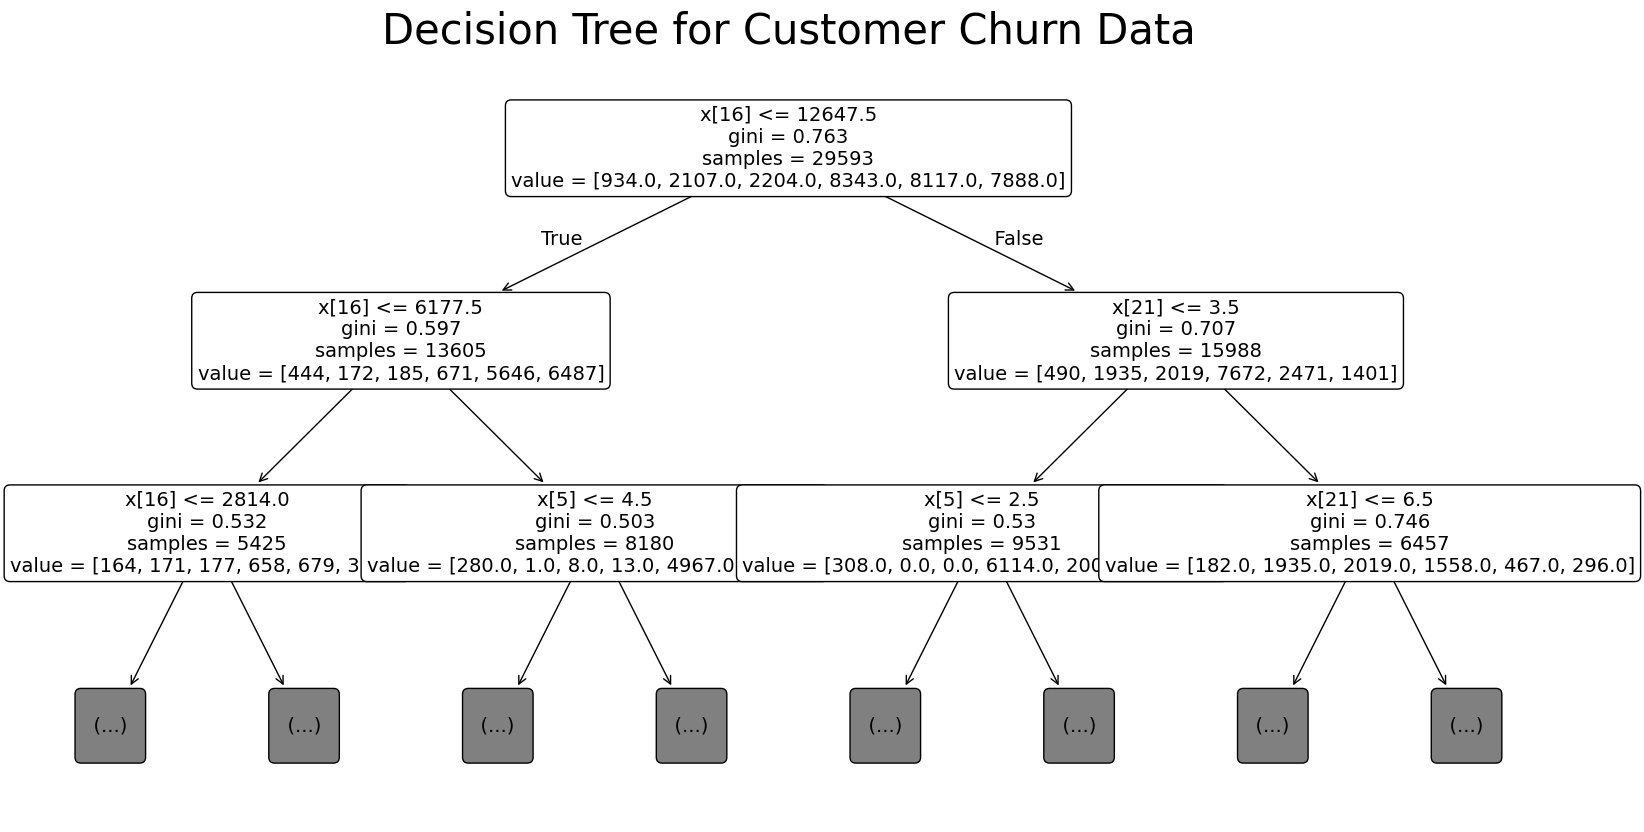

In [18]:
s = plt.figure(figsize=(20,10))
tree.plot_tree(Model, max_depth=2, filled=False, fontsize=14, rounded=True)
plt.title("Decision Tree for Customer Churn Data", fontsize=30)
plt.show()